In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv('per_game2020-03-05 15:49:16.301245.csv')
df2 = pd.read_csv('advanced2020-03-05 15:49:09.996976.csv')
df_mvp = pd.read_csv('../mvp.csv', header=1)

In [185]:
type(df_mvp)

pandas.core.frame.DataFrame

In [202]:
top5 = df_mvp.head(5)

In [237]:
top5['PTS'].values

array([27.7, 30.4, 31.6, 30.1, 23.8])

In [230]:
mp_cut_ser.index[0].left

0.464

In [246]:
lefts = [i.left for i in mp_cut_ser.index]
lefts

[0.464, 7.78, 15.06, 22.34, 29.62]

In [242]:
top5['PTS'].values[0] >= lefts[0] and top5['PTS'].values[0] <= lefts[1]

False

In [247]:
for i in top5['PTS'].values:
    if i >= lefts[0] and i <= lefts[1]:
        print(i,lefts[0])
    elif i >= lefts[1] and i <= lefts[2]:
        print(i,lefts[1])
    elif i >= lefts[2] and i <= lefts[3]:
        print(i,lefts[3])
    else:
        print(i,lefts[4])

27.7 29.62
30.4 29.62
31.6 29.62
30.1 29.62
23.8 29.62


In [223]:
mp_cut_ser.index

CategoricalIndex([(0.464, 7.78], (7.78, 15.06], (15.06, 22.34], (22.34, 29.62],
                  (29.62, 36.9]],
                 categories=[(0.464, 7.78], (7.78, 15.06], (15.06, 22.34], (22.34, 29.62], (29.62, 36.9]], ordered=True, dtype='category')

In [163]:
mp_cut_ser = pd.cut(df['MP'], 5).value_counts().sort_index(ascending=True)

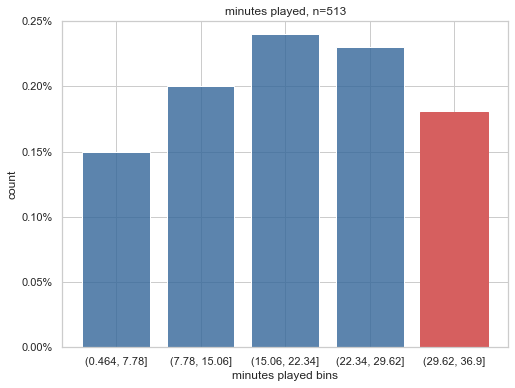

In [248]:
from matplotlib.ticker import PercentFormatter

# 1) set up explanatory variables

x = list(range(1,len(mp_cut_ser)+1))
y = [round(i/sum(mp_cut_ser.values),2) for i in mp_cut_ser.values]

# 2) set style
sns.set(style='whitegrid', palette='GnBu_d')

# 3) create figure
plt.figure(figsize=(8,6))

# 4) create plot
barlist = plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.8))
barlist[4].set_color('r')
plt.xticks(x, mp_cut_ser.index)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=2))

# 5) add title, labels
plt.title('minutes played, n=513')
plt.xlabel('minutes played bins')
plt.ylabel('count')

# 6) add boundaries
plt.ylim(0, 0.25)

plt.show()

In [277]:
pts_cut = pd.cut(df['PTS'], 10).value_counts().sort_index(ascending=True)

In [278]:
pts_cut

(-0.0349, 3.49]    115
(3.49, 6.98]       137
(6.98, 10.47]      102
(10.47, 13.96]      61
(13.96, 17.45]      34
(17.45, 20.94]      37
(20.94, 24.43]      11
(24.43, 27.92]      10
(27.92, 31.41]       5
(31.41, 34.9]        1
Name: PTS, dtype: int64

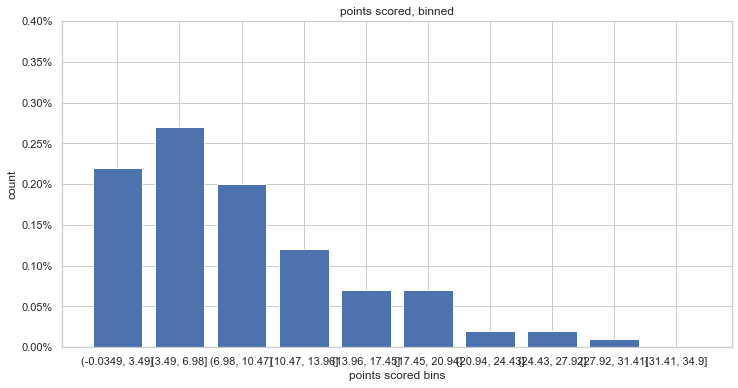

In [279]:
from matplotlib.ticker import PercentFormatter

# 1) set up explanatory variables

x = list(range(1,len(pts_cut)+1))
y = [round(i/sum(pts_cut.values),2) for i in pts_cut.values]

# 2) set style
sns.set(style='whitegrid')

# 3) create figure
plt.figure(figsize=(12,6))

# 4) create plot
plt.bar(x, y)
plt.xticks(x, pts_cut.index)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=2))

# 5) add title, labels
plt.title('points scored, binned')
plt.xlabel('points scored bins')
plt.ylabel('count')

# 6) add boundaries
plt.ylim(0,0.4)

plt.show()

In [249]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,56,56,27.0,4.6,7.7,0.591,...,0.590,3.4,6.0,9.4,2.5,0.8,1.1,1.5,2.0,11.0
1,Bam Adebayo,PF,22,MIA,62,62,34.4,6.2,11.0,0.565,...,0.690,2.5,8.0,10.5,5.0,1.2,1.3,2.8,2.4,16.1
2,LaMarcus Aldridge,C,34,SAS,52,52,33.0,7.3,14.8,0.495,...,0.829,2.0,5.5,7.5,2.4,0.6,1.6,1.4,2.4,18.8
3,Nickeil Alexander-Walker,SG,21,NOP,41,0,12.2,1.9,5.5,0.339,...,0.607,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1
4,Grayson Allen,SG,24,MEM,30,0,16.6,2.6,5.9,0.449,...,0.857,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4


In [355]:
df_box_score = df[['Player','MP','PTS','TRB','AST']]

In [356]:
print(df_box_score.median())
print(df_box_score.mean())

MP     19.0
PTS     7.3
TRB     3.2
AST     1.4
dtype: float64
MP     19.325536
PTS     8.620858
TRB     3.599610
AST     1.891423
dtype: float64


In [357]:
df_mvp2 = df_mvp[['Season','Player','MP', 'PTS','TRB','AST']][0:40]

In [358]:
interval_pts = pd.Interval(left=df_mvp2['PTS'].min(), right=df_mvp2['PTS'].max())
interval_trb = pd.Interval(left=df_mvp2['TRB'].min(), right=df_mvp2['TRB'].max())
interval_ast = pd.Interval(left=df_mvp2['AST'].min(), right=df_mvp2['AST'].max())

In [359]:
interval_pts.left

15.5

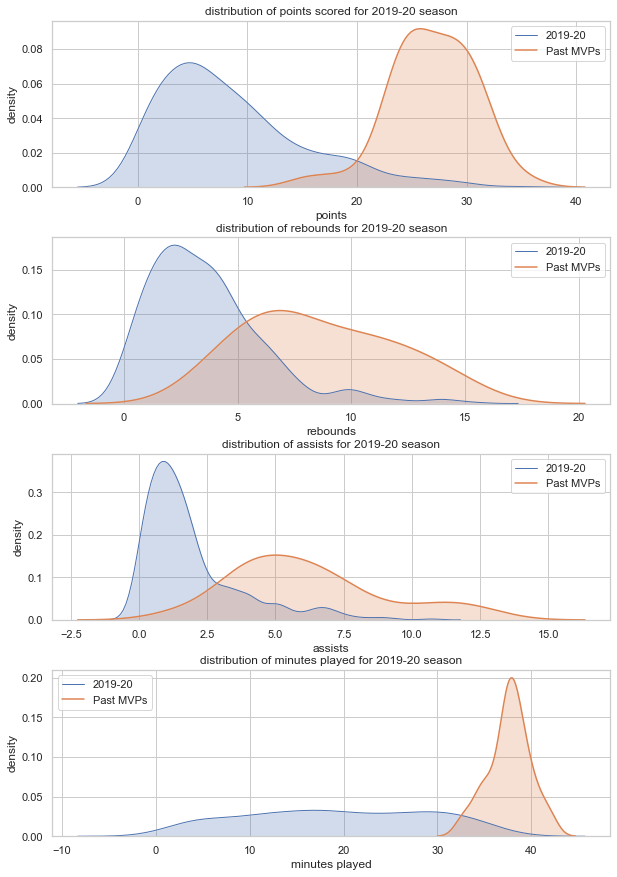

In [361]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,15))
gs = GridSpec(nrows=4, ncols=1, hspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax0 = sns.distplot(df_box_score['PTS'], hist=False
                  , kde = True, kde_kws = {'shade': True, 'linewidth': 1, 'label': '2019-20'})
ax0 = sns.distplot(df_mvp2['PTS'], hist=False, kde=True, kde_kws={'shade':True, 'label': 'Past MVPs'})

ax0.set_title('distribution of points scored for 2019-20 season')
ax0.set_xlabel('points')
ax0.set_ylabel('density')

ax1 = fig.add_subplot(gs[1,0])
ax1 = sns.distplot(df_box_score['TRB'], hist=False
                  , kde = True, kde_kws = {'shade': True, 'linewidth': 1, 'label': '2019-20'})
ax1 = sns.distplot(df_mvp2['TRB'], hist=False, kde=True, kde_kws={'shade':True, 'label': 'Past MVPs'})

ax1.set_title('distribution of rebounds for 2019-20 season')
ax1.set_xlabel('rebounds')
ax1.set_ylabel('density')


ax2 = fig.add_subplot(gs[2,0])
ax2 = sns.distplot(df_box_score['AST'], hist=False
                  , kde = True, kde_kws = {'shade': True, 'linewidth': 1, 'label': '2019-20'})
ax2 = sns.distplot(df_mvp2['AST'], hist=False, kde=True, kde_kws={'shade':True, 'label': 'Past MVPs'})

ax2.set_title('distribution of assists for 2019-20 season')
ax2.set_xlabel('assists')
ax2.set_ylabel('density');


ax3 = fig.add_subplot(gs[3,0])
ax3 = sns.distplot(df_box_score['MP'], hist=False
                  , kde = True, kde_kws = {'shade': True, 'linewidth': 1, 'label': '2019-20'})
ax3 = sns.distplot(df_mvp2['MP'], hist=False, kde=True, kde_kws={'shade':True, 'label': 'Past MVPs'})

ax3.set_title('distribution of minutes played for 2019-20 season')
ax3.set_xlabel('minutes played')
ax3.set_ylabel('density');

In [364]:
print(df_mvp2.max())
print(df_mvp2.min())

Season                 2018-19
Player    Tim Duncan\duncati01
MP                          42
PTS                         35
TRB                       15.3
AST                       12.8
dtype: object
Season                    1979-80
Player    Allen Iverson\iversal01
MP                           32.7
PTS                          15.5
TRB                           3.3
AST                           1.3
dtype: object


In [365]:
# cutoffs
# MP = 30 (min = 32.7)
# PTS = 15 (min = 15.5)
# TRB = 3 (min = 3.3)
# AST = 1 (min = 1.3)

In [370]:
df_culled = df_box_score[(df_box_score['MP'] >= 30) & (df_box_score['PTS'] >= 15) 
             & (df_box_score['TRB'] >= 3) & (df_box_score['AST'] >= 1)]

In [374]:
df_culled['Player'].values

array(['Bam Adebayo', 'LaMarcus Aldridge', 'Giannis Antetokounmpo',
       'Carmelo Anthony', 'Deandre Ayton', 'Bradley Beal',
       'Bojan Bogdanović', 'Devin Booker', 'Malcolm Brogdon',
       'Jaylen Brown', 'Jimmy Butler', 'John Collins', 'Anthony Davis',
       'DeMar DeRozan', 'Spencer Dinwiddie', 'Luka Dončić',
       'Andre Drummond', 'Joel Embiid', "De'Aaron Fox",
       'Danilo Gallinari', 'Shai Gilgeous-Alexander', 'Rudy Gobert',
       "Devonte' Graham", 'James Harden', 'Tobias Harris',
       'Gordon Hayward', 'Buddy Hield', 'Jrue Holiday', 'Brandon Ingram',
       'Kyrie Irving', 'LeBron James', 'Nikola Jokić', 'Luke Kennard',
       'Zach LaVine', 'Kawhi Leonard', 'Damian Lillard', 'Kevin Love',
       'Kyle Lowry', 'Lauri Markkanen', 'CJ McCollum', 'Donovan Mitchell',
       'Marcus Morris', 'Jamal Murray', 'Kelly Oubre', 'Chris Paul',
       'Kristaps Porziņģis', 'Julius Randle', 'Terry Rozier',
       "D'Angelo Russell", 'Domantas Sabonis', 'Dennis Schröder',
       

In [381]:
df_mvp3 = df_mvp2.drop(columns=['Season', 'Player'])

In [385]:
df_mvp3['MVP'] = 1

In [387]:
X = df_mvp3[['MP', 'PTS', 'TRB', 'AST']]
y = df_mvp3['MVP']

In [388]:
from sklearn.model_selection import train_test_split

In [390]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

/Users/stephaniezhu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# colormap = plt.cm.Greens
# plt.figure(figsize=(16,16))
# sns.heatmap(corr, cmap=colormap, annot=True)
# plt.show()